In [23]:
#Load libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.datasets import load_boston, load_svmlight_file
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, KFold, cross_val_predict

## 1. Preparing the data

In [24]:
boston = load_boston()

In [25]:
#Keys
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [26]:
#Data set description
#print(boston.DESCR)

In [27]:
# Creating boston_data, boston_target
boston_data = pd.DataFrame(boston.data, columns = boston.feature_names)
boston_target = boston.target

In [28]:
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [29]:
boston_target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [30]:
boston_dataframe = boston_data.copy()
boston_dataframe["PRICE"] = boston_target
boston_dataframe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## 2. Correlation matrix

In [31]:
corr_matrix = boston_dataframe.corr()

In [32]:
corr_matrix.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220,-0.385832
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321


In [33]:
# Mark to hide upper triangle
mask = np.zeros_like(corr_matrix, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
print(mask)

[[ True  True  True  True  True  True  True  True  True  True  True  True
   True  True]
 [False  True  True  True  True  True  True  True  True  True  True  True
   True  True]
 [False False  True  True  True  True  True  True  True  True  True  True
   True  True]
 [False False False  True  True  True  True  True  True  True  True  True
   True  True]
 [False False False False  True  True  True  True  True  True  True  True
   True  True]
 [False False False False False  True  True  True  True  True  True  True
   True  True]
 [False False False False False False  True  True  True  True  True  True
   True  True]
 [False False False False False False False  True  True  True  True  True
   True  True]
 [False False False False False False False False  True  True  True  True
   True  True]
 [False False False False False False False False False  True  True  True
   True  True]
 [False False False False False False False False False False  True  True
   True  True]
 [False False False F

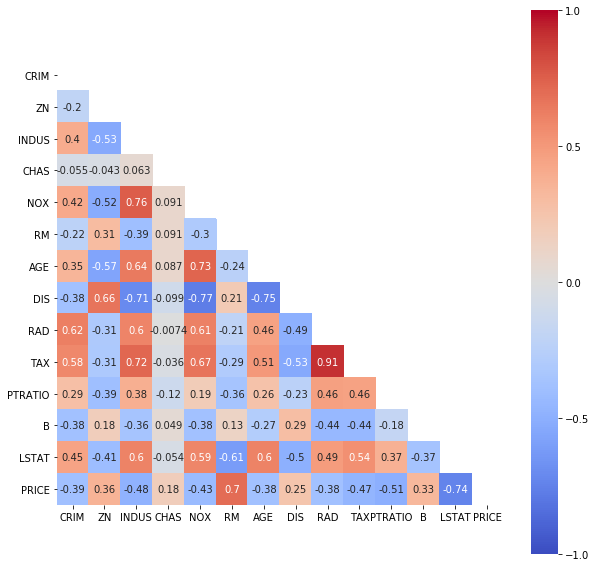

In [34]:
# Correlation heat map
fig, ax = plt.subplots(figsize = (10,10))

heatmap = sns.heatmap(corr_matrix, 
                      mask = mask, 
                      square = True, 
                      cmap = "coolwarm", 
                      cbar_kws = {"ticks": [-1, -0.5, 0, 0.5, 1]}, 
                      vmin = -1, 
                      vmax = 1, 
                      annot = True, 
                      annot_kws = {'size': 10})

plt.show()

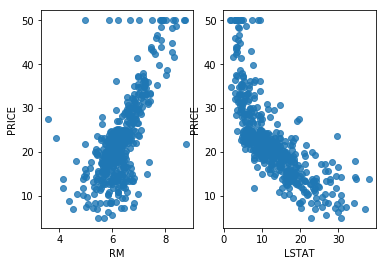

In [35]:
fig, ax = plt.subplots(1,2)
sns.regplot("RM", "PRICE", data = boston_dataframe, ax = ax[0], fit_reg = False)
sns.regplot("LSTAT", "PRICE", data = boston_dataframe, ax = ax[1], fit_reg = False)

## 3. Multivariate Linear regression

In [36]:
# Train and test set
x_train, x_test, y_train, y_test = train_test_split(boston_data, boston_target, test_size = 0.20, random_state = 0)

# 1. Create the model
linear_regression = linear_model.LinearRegression()

linear_regression.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [37]:
coefficients = linear_regression.coef_
intercept = linear_regression.intercept_
for i in coefficients:
    print(i)

-0.11841031848800647
0.04475506427542792
0.0058567468875108395
2.342301172068975
-16.16340241895811
3.70135143317004
-0.003045536610762337
-1.3866454197080715
0.24378417101785885
-0.010985615719690218
-1.0469913342047095
0.008220147293170822
-0.4936424518976014


In [38]:
print("w0 = {}".format(intercept))

for i in range(1, len(coefficients)+1):
    print("w{} = {}".format(i, coefficients[i-1]))

w0 = 38.138692713392466
w1 = -0.11841031848800647
w2 = 0.04475506427542792
w3 = 0.0058567468875108395
w4 = 2.342301172068975
w5 = -16.16340241895811
w6 = 3.70135143317004
w7 = -0.003045536610762337
w8 = -1.3866454197080715
w9 = 0.24378417101785885
w10 = -0.010985615719690218
w11 = -1.0469913342047095
w12 = 0.008220147293170822
w13 = -0.4936424518976014


In [39]:
# 3. test prediction
y_pred = linear_regression.predict(x_test)

it is important to peform normalization and standardization

## 4. Evaluating performance of the model

In [40]:
# mean squared error

# 1. mse equation
MSE_formula = np.mean((y_pred - y_test)**2)

# 2. mse sklearn
MSE_sklearn = mean_squared_error(y_test, y_pred)

# 3. RMSE
RMSE_sklearn = np.sqrt(MSE_sklearn)

# 4. R2 sklearn
R2_sklearn = r2_score(y_test, y_pred)

# 5. R2 (coefficient of determination)
R2_model = linear_regression.score(x_test, y_test)


In [41]:
print("MSE_formula = ", MSE_formula)
print("MSE_sklearn = ", MSE_sklearn)
print("RMSE_sklearn = ", RMSE_sklearn)
print("R2_sklearn = ", R2_sklearn)
print("R2_model = ", R2_model)

MSE_formula =  33.45070896769115
MSE_sklearn =  33.45070896769115
RMSE_sklearn =  5.783658787280864
R2_sklearn =  0.5892011519186435
R2_model =  0.5892011519186435


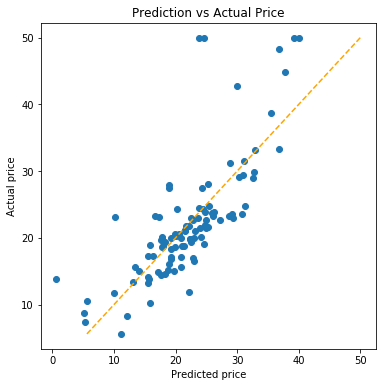

In [42]:
#Prediction vs Actual value
fig, ax = plt.subplots(figsize = (6,6))
ax.scatter(y_pred, y_test)
ax.set_title("Prediction vs Actual Price")
ax.set_xlabel("Predicted price")
ax.set_ylabel("Actual price")
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "--", color = "orange")
plt.show()

## 5. KFold

In [43]:
#KFold object creation
kf = KFold(n_splits = 5)

#KFold prediction
boston_target_prediction = cross_val_predict(linear_regression, boston_data, boston_target, cv = kf)

#RMSE
rmse_cv = np.sqrt(mean_squared_error(boston_target_prediction, boston_target))
print("RMSE on 5-fold cross validation = ", rmse_cv)

RMSE on 5-fold cross validation =  6.097044039669892


Reference: Machine Learning Algorithms by Giuseppe Bonaccorso